# Interpretability methods applied on the FFNN used to awnser RQ1

## importing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import KFold
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import r2_score
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['figure.dpi']=200
device='cpu'

In [3]:

X_train = pd.read_csv('../datasets/Toy/X_train.csv',index_col=0)  
X_test = pd.read_csv('../datasets/Toy/X_test.csv',index_col=0)  
y_train = pd.read_csv('../datasets/Toy/y_train.csv',index_col=0)  
y_test = pd.read_csv('../datasets/Toy/y_test.csv',index_col=0)  
# Specify the split ratio. For example, let's use 80% for training and 20% for validation
split_ratio = 0.2

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=split_ratio, random_state=42)
# Sample 300 points from each dataset
# Set random seed for reproducibility
random_seed = 42
X_train_sample = X_train.sample(n=300, random_state=random_seed)
y_train_sample = y_train.loc[X_train_sample.index]

X_test_sample = X_test.sample(n=300, random_state=random_seed)
y_test_sample = y_test.loc[X_test_sample.index]

# Optionally, save the sampled datasets to csv
#X_train_sample.to_csv('../datasets/Toy/X_train_sample.csv')
#y_train_sample.to_csv('../datasets/Toy/y_train_sample.csv')
#X_test_sample.to_csv('../datasets/Toy/X_test_sample.csv')
#y_test_sample.to_csv('../datasets/Toy/y_test_sample.csv')

In [5]:
X_test_sample

,x0,x1,x2,x3,x4,x5
87839,2.980198,6.333492,-0.370338,1.385074,165.939676,0
14037,1.449400,5.301023,0.426470,1.352234,159.217121,0
6322,1.389094,4.133256,-0.307353,1.238501,165.777115,1
178520,2.229407,6.693314,-0.821097,2.223714,160.331000,0
35588,2.170612,7.059676,0.323352,1.372139,165.309711,1
...,...,...,...,...,...,...
170632,1.816596,5.320951,-0.948876,2.222765,159.632257,1
139561,2.099128,5.726054,-0.718956,2.089481,161.583227,1
102025,-0.215859,1.747662,-0.379728,0.616008,164.462846,0
96558,0.880695,4.712358,-0.732655,1.672270,160.784784,0


In [14]:
import torch.nn as nn
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class ComputeY(nn.Module):
    def __init__(self):
        super(ComputeY, self).__init__()

        # Define constants as torch Tensors
        self.c = torch.tensor(1400.0)
        self.a = torch.tensor([1, 10, 7, 1, 5, 2, 8, 1, 1], dtype=torch.float32)

    def forward(self, x):
        # x should be of shape [batch_size, num_features]
        # Based on the given equation, compute y
        y = (self.c + self.a[0]*x[:,0] + 30*x[:,5] + self.a[1]*x[:,1]*x[:,2] + 
             self.a[2]*(x[:,3]/2 + self.a[4])**2 - self.a[5]*torch.sin(x[:,4] + self.a[6]) + 
             3*x[:,1])

        return y

# Example usage:
# y_model = ComputeY()
# y_values = y_model(torch.tensor(X_s, dtype=torch.float32))
# where X_s is your input tensor containing the data.



In [18]:
y_model = ComputeY()
y_model(torch.tensor(X_test_sample.values, dtype=torch.float32))

tensor([1627.1875, 1666.7955, 1653.7885, 1630.7692, 1703.4945, 1717.2098,
        1611.2524, 1649.3160, 1665.7765, 1639.5077, 1596.7153, 1607.8007,
        1614.1497, 1628.2386, 1633.5178, 1609.4578, 1745.9934, 1757.4485,
        1616.9758, 1659.3484, 1696.5847, 1679.3778, 1621.3977, 1620.7739,
        1599.0549, 1611.3940, 1726.4872, 1626.5101, 1768.0665, 1629.2998,
        1657.2170, 1645.6044, 1637.6951, 1735.0039, 1676.9872, 1672.8358,
        1588.3660, 1699.8966, 1673.1635, 1646.2384, 1631.4473, 1637.2769,
        1626.5385, 1720.4951, 1622.1818, 1741.0820, 1628.5725, 1682.2668,
        1681.6133, 1601.6321, 1623.8610, 1585.9678, 1640.7522, 1602.5195,
        1691.7755, 1636.6321, 1596.8278, 1739.4847, 1622.8508, 1628.2341,
        1675.1388, 1691.4977, 1646.5242, 1642.3761, 1610.2042, 1679.4431,
        1648.9937, 1627.0746, 1615.6670, 1592.2096, 1593.1571, 1657.8958,
        1647.0769, 1620.1464, 1656.0061, 1581.1409, 1734.4294, 1720.4434,
        1673.2601, 1659.5477, 1613.743

In [8]:
y_test_sample

,y
87839,1627.187408
14037,1666.795609
6322,1653.788516
178520,1630.769280
35588,1703.494375
...,...
170632,1660.540144
139561,1664.007132
102025,1594.976954
96558,1620.433017


## ICE plots

In [22]:
import torch
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

def ice_plot(model, X_s, X, y, feature, num_points=None, off=0):
    
    # Initialize a figure and axis
    fig, ax = plt.subplots()
    feature_index=X.columns.get_loc(feature)
    # Extract the unique feature values from the unscaled data
    feature_values = pd.unique(X.loc[:, feature].sort_values())
    feature_values_s = np.unique(np.sort(X_s[:, feature_index]))
    
    # Normalize the CGPA values for coloring
    cgpa_values = X.loc[:, 'x1'].values
    normalized_cgpa = (cgpa_values - np.min(cgpa_values)) / (np.max(cgpa_values) - np.min(cgpa_values))
    cmap = plt.get_cmap('coolwarm')

    # If num_points is specified, select a subset of equally spaced unique feature values
    if num_points is not None:
        idx = np.round(np.linspace(0, len(feature_values) - 1, num_points)).astype(int)
        feature_values = feature_values.iloc[idx]
        feature_values_s = feature_values_s[idx]

    XXX = X_s.copy()
    predictions_all = []

    # Loop through instances in the test set
    for instance, i in zip(XXX, range(len(X_s))):
        # Create an array to store predictions for this instance
        predictions = []
        original_prediction = model(torch.tensor(instance, dtype=torch.float32).unsqueeze(0).to(device)).item()

        # Loop through the unique feature values
        for val in feature_values_s:
            # Set the feature value for the current instance
            instance[feature_index] = val

            # Convert the instance to a PyTorch tensor and unsqueeze to add batch dimension
            instance_tensor = torch.tensor(instance, dtype=torch.float32).unsqueeze(0).to(device)

            # Get the prediction from the model
            with torch.no_grad():
                prediction = model(instance_tensor).item()
            predictions.append(prediction)

        predictions_all.append(predictions)

        # Plot the ICE curve for this instance in the color corresponding to CGPA value with transparency
        ax.plot(feature_values, predictions, color=cmap(normalized_cgpa[i]), alpha=0.5)
        
        # Plot the marker for the original value
        original_val = X.iloc[i, feature_index+off]
        ax.scatter(original_val, original_prediction, marker='o', color=cmap(normalized_cgpa[i]), zorder=10)

    # Calculate the mean of all ICE lines
    mean_predictions = np.mean(predictions_all, axis=0)

    # Plot the mean ICE curve in black and thicker
    ax.plot(feature_values, mean_predictions, color='black', linewidth=2)

    # Label the plot
    ax.set_xlabel(feature)
    ax.set_ylabel('Predictions')
    ax.set_title('ICE plot for {}'.format(feature))
    
    # Add colorbar for CGPA
    sm = ScalarMappable(cmap=cmap, norm=Normalize(0, 1))
    sm.set_array([])
    
    # Define the colorbar
    cbar = fig.colorbar(sm, ax=ax, orientation='vertical', label='x1')

    # Customize colorbar ticks
    min_val, max_val = np.min(cgpa_values), np.max(cgpa_values)
    tick_values = np.linspace(min_val, max_val, num=6)  # 6 ticks
    normed_ticks = (tick_values - min_val) / (max_val - min_val)  # Normalize tick values (0 to 1 range)
    cbar.set_ticks(normed_ticks)
    
    # Set tick labels with two decimal places
    cbar.set_ticklabels(['{:.2f}'.format(val) for val in tick_values])

    # Show the plot
    plt.show()


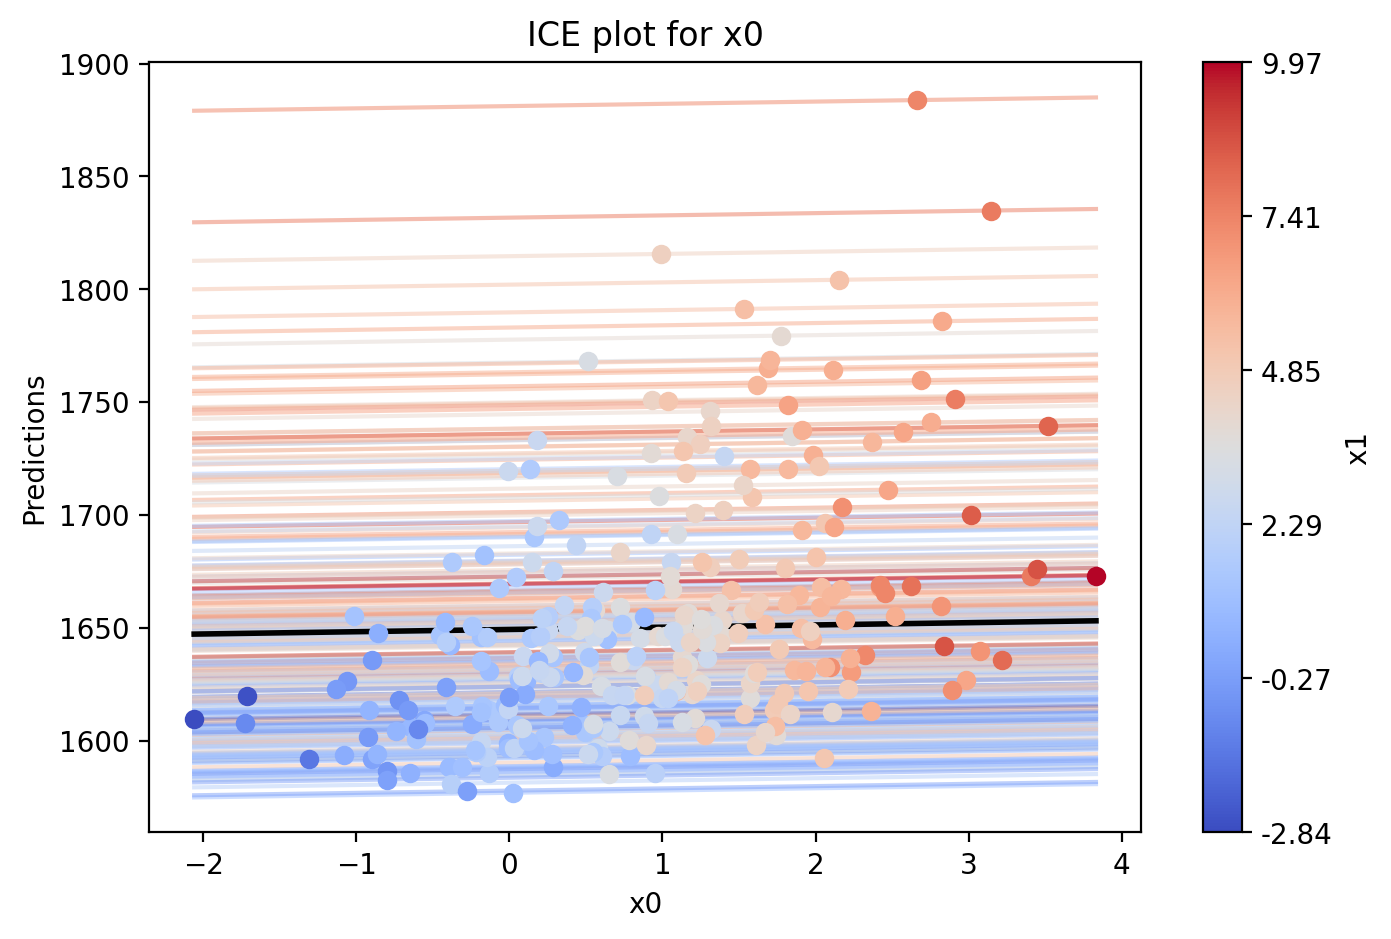

In [23]:
ice_plot(y_model, X_test_sample.values, X_test_sample, y_test_sample,'x0')


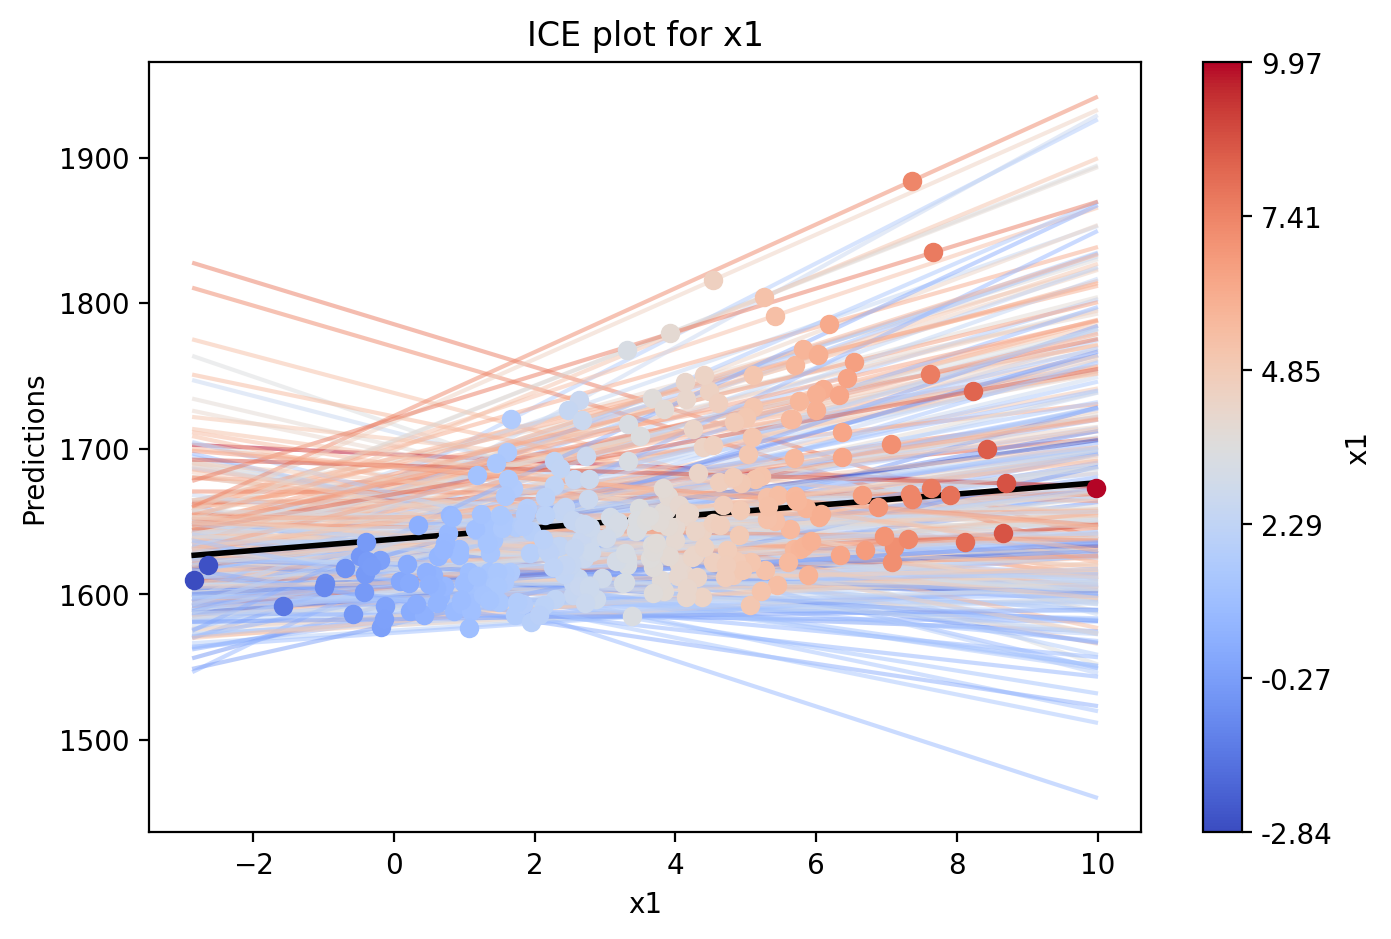

In [87]:
ice_plot(y_model, X_test_sample.values, X_test_sample, y_test_sample,'x1')

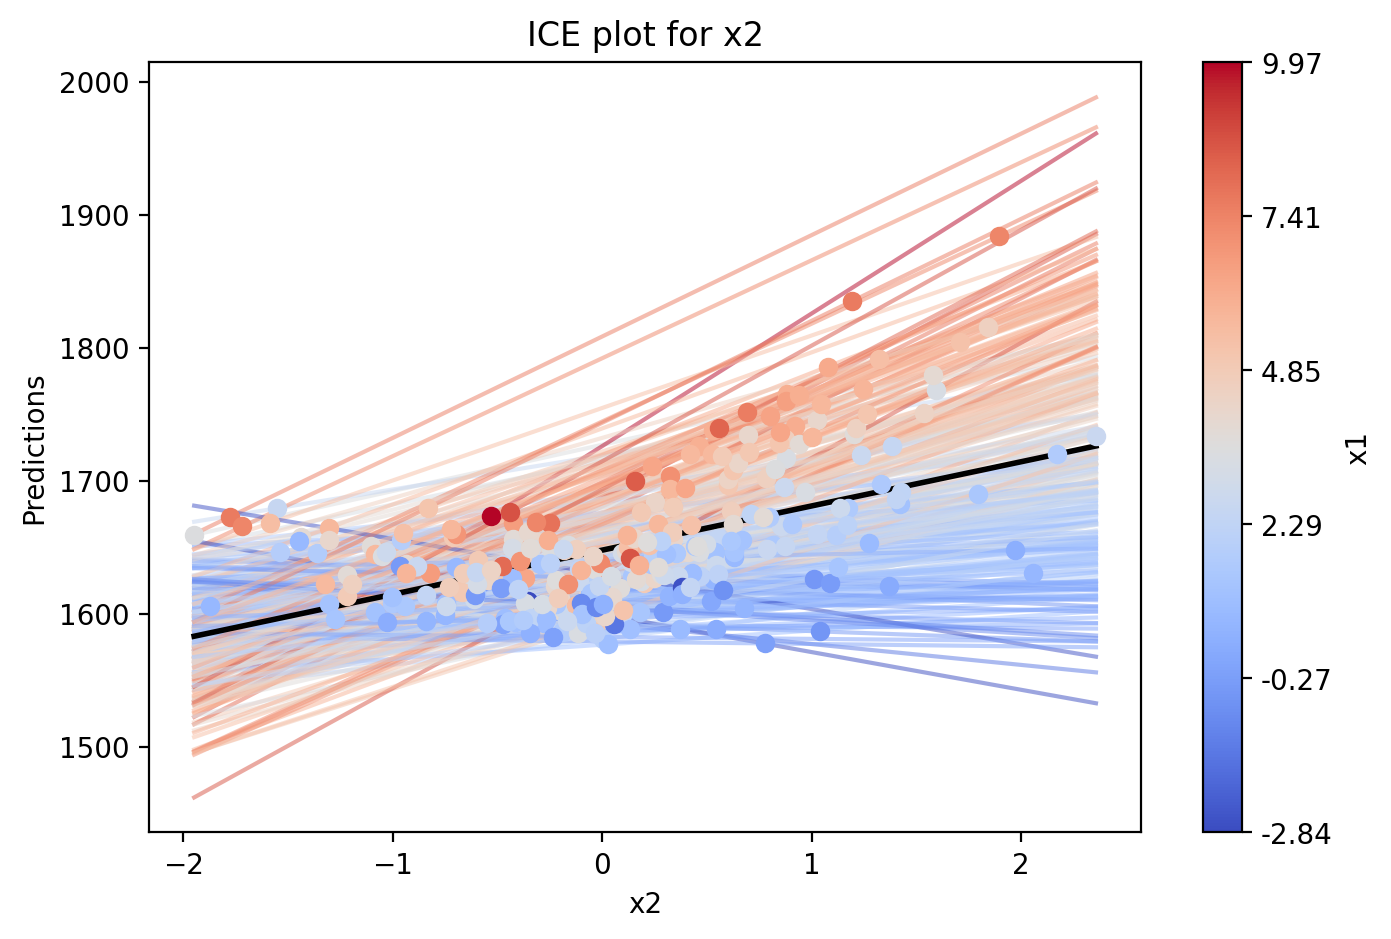

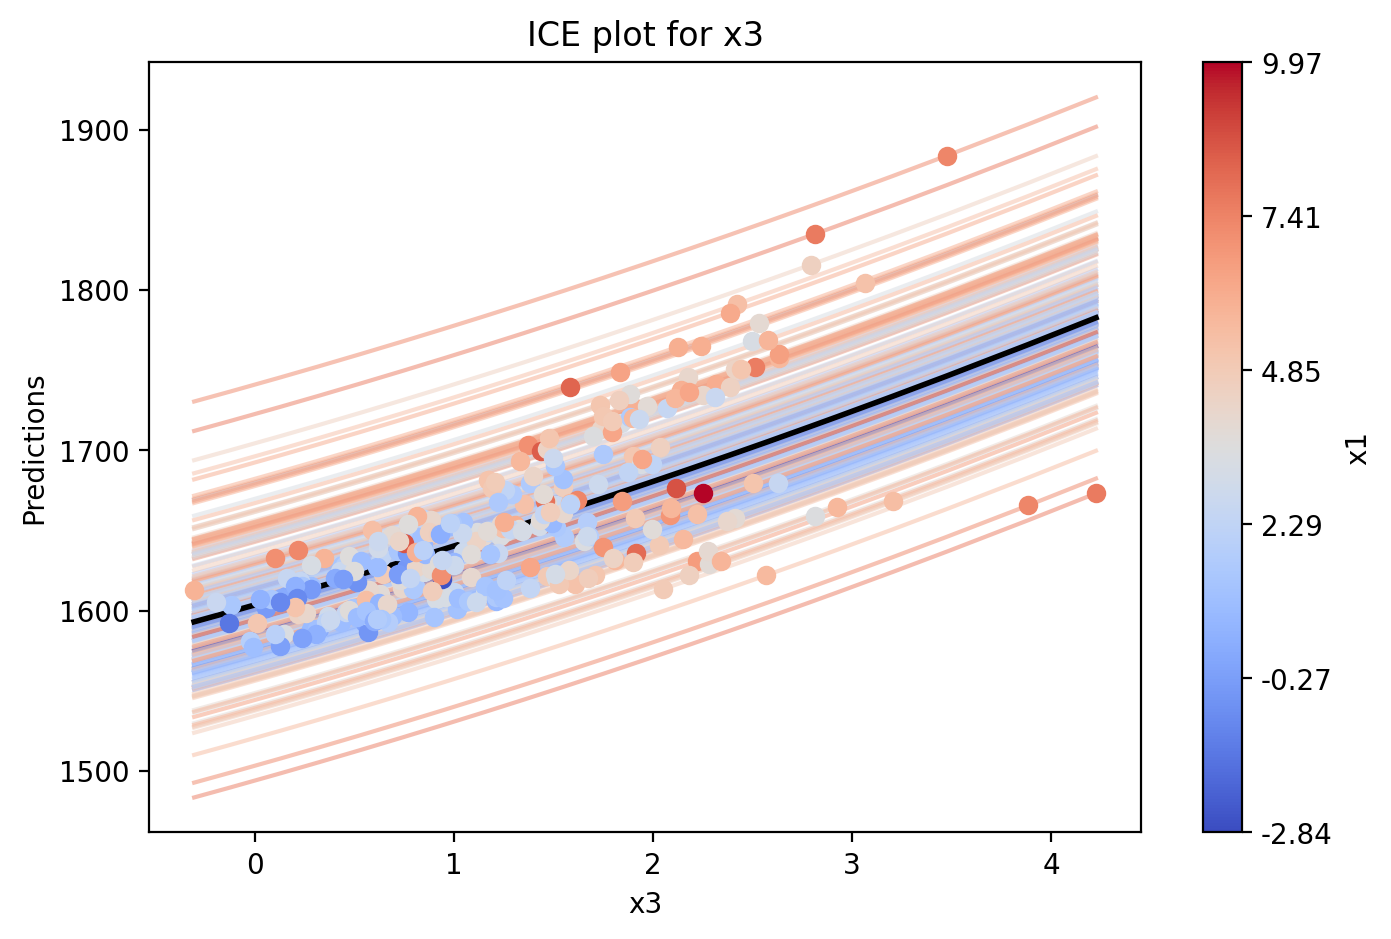

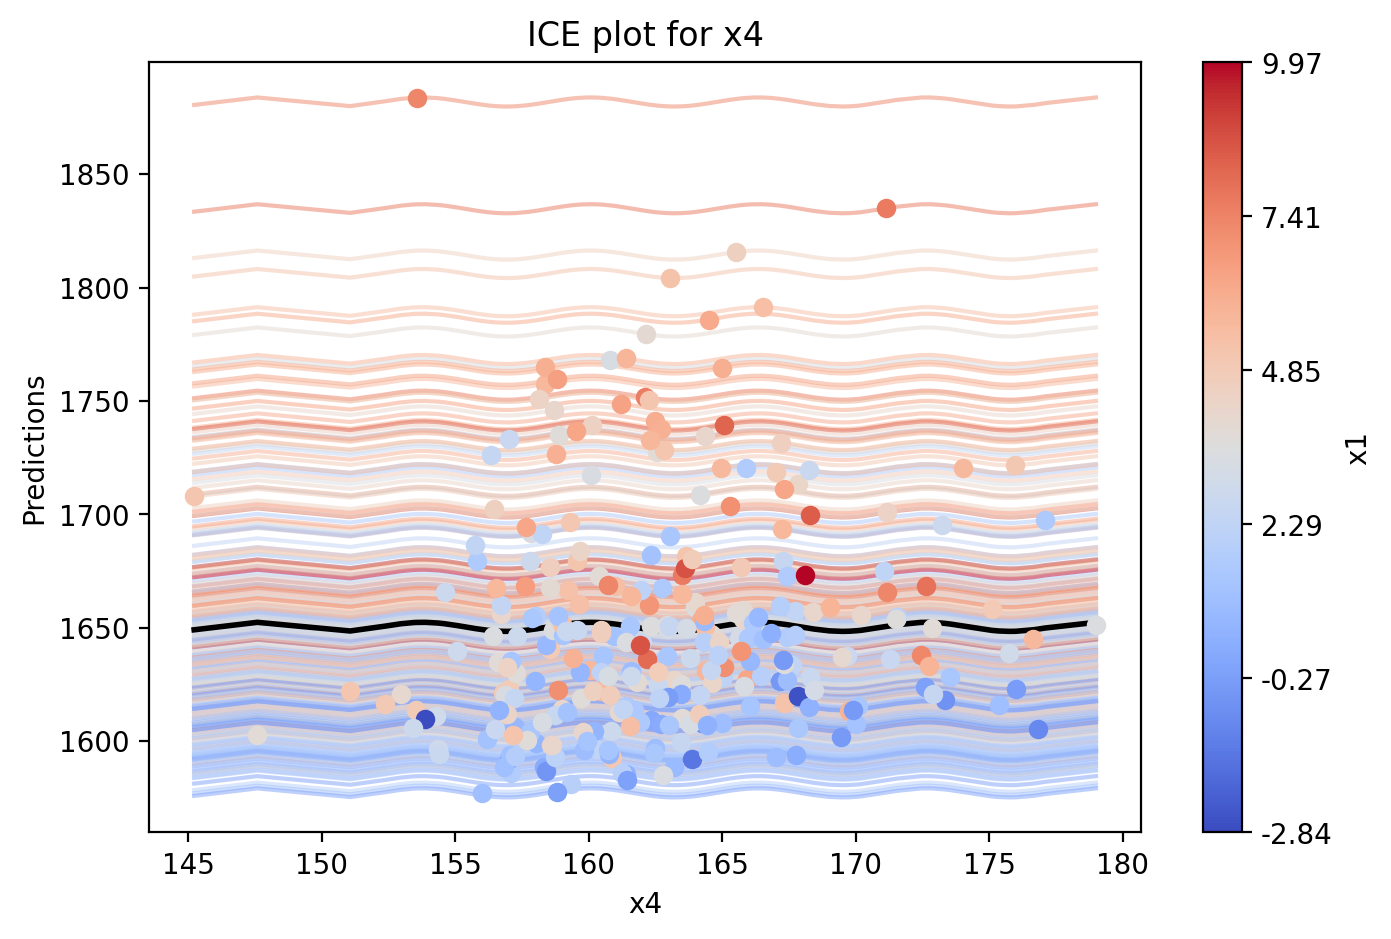

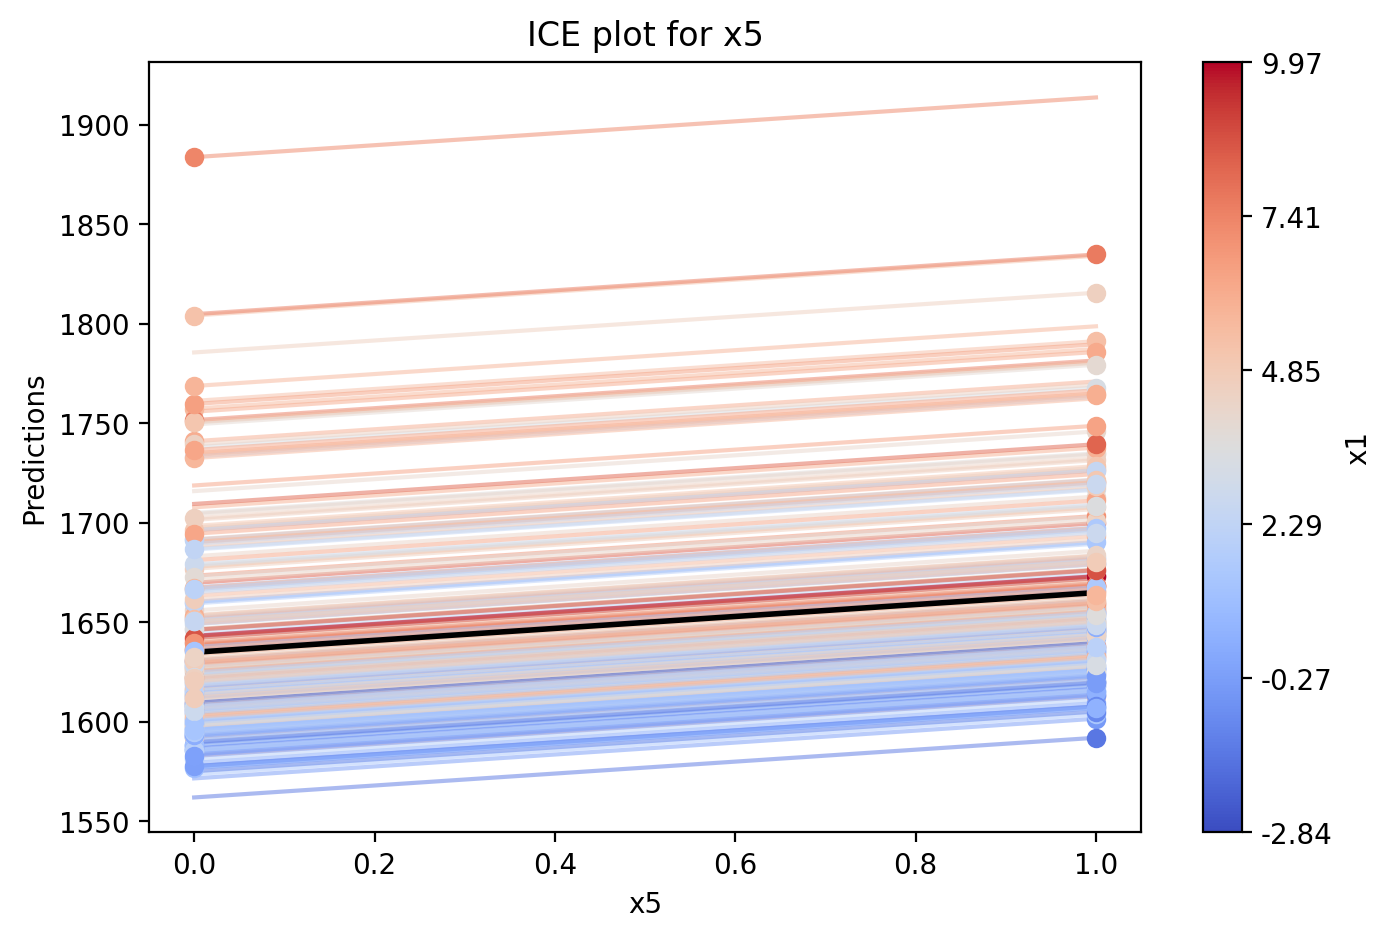

In [25]:
ice_plot(y_model, X_test_sample.values, X_test_sample, y_test_sample,'x2')
ice_plot(y_model, X_test_sample.values, X_test_sample, y_test_sample,'x3')
ice_plot(y_model, X_test_sample.values, X_test_sample, y_test_sample,'x4')
ice_plot(y_model, X_test_sample.values, X_test_sample, y_test_sample,'x5')


## KernelSHAP feature importance

In [74]:
from captum.attr import KernelShap

In [75]:
baseline_unscaled = X_test.mean(axis=0)

In [76]:
baseline_unscaled

x0      1.000645
x1      3.596130
x2      0.001764
x3      1.349328
x4    162.534424
x5      0.499725
dtype: float64

In [77]:
y_test_series = y_test_sample.iloc[:, 0]
device=torch.device('cpu')
worst_instance = torch.tensor(X_test_sample.values[y_test_series.argmin()]).unsqueeze(0).float().to(device)
best_instance = torch.tensor(X_test_sample.values[y_test_series.argmax()]).unsqueeze(0).float().to(device)

baseline = torch.tensor(X_test.values.mean(axis=0)).unsqueeze(0).float().to(device)
baseline_clone=baseline
#baseline_clone = baseline.clone()
#baseline_clone[0][5] = 1
#baseline_value=net(torch.Tensor(X_test_scaled).to(device)).mean().item()
print(y_model(best_instance))
print(y_model(worst_instance))
#print(net(torch.Tensor(X_test_scaled).to(device)).mean())
print(y_model(baseline_clone))


tensor([1883.8274])
tensor([1577.0800])
tensor([1650.7047])


In [78]:
# Instantiate KernelShap
ks = KernelShap(y_model)

In [79]:
worst_shap_values = ks.attribute(worst_instance, baseline_clone,n_samples=30000)
best_shap_values = ks.attribute(best_instance, baseline_clone,n_samples=30000)
baseline_shap_values=ks.attribute(baseline_clone, baseline_clone,n_samples=30000)

In [80]:
worst_shap_np = worst_shap_values.cpu().detach().numpy()
best_shap_np = best_shap_values.cpu().detach().numpy()

In [81]:
best_shap_np

array([[  1.511076 ,  47.112778 , 103.42839  ,  92.32703  ,   3.6209755,
        -14.875172 ]], dtype=float32)

In [82]:
import shap
def shap_vis(values,baseline_shap_values,data):
    print(values)
    print(baseline_shap_values)
    print(data)

    # define the corresponding SHAP values
    shap_values = values

    # get the index of the baseline value
    baseline_index = np.argmin(np.abs(shap_values))

    # get the baseline value
    baseline_value = baseline_shap_values

    # create a SHAP Explanation object
    expl = shap.Explanation(values=shap_values,
                        base_values=baseline_value,
                        data=data,
                        feature_names=X_train.columns)

    # create a SHAP waterfall plot
    shap.plots.waterfall(expl)

    shap.plots.force(expl)

[  1.511076   47.112778  103.42839    92.32703     3.6209755 -14.875172 ]
1650.7047119140625
x0      2.663692
x1      7.353498
x2      1.893728
x3      3.478006
x4    153.564981
x5      0.000000
Name: 23126, dtype: float64


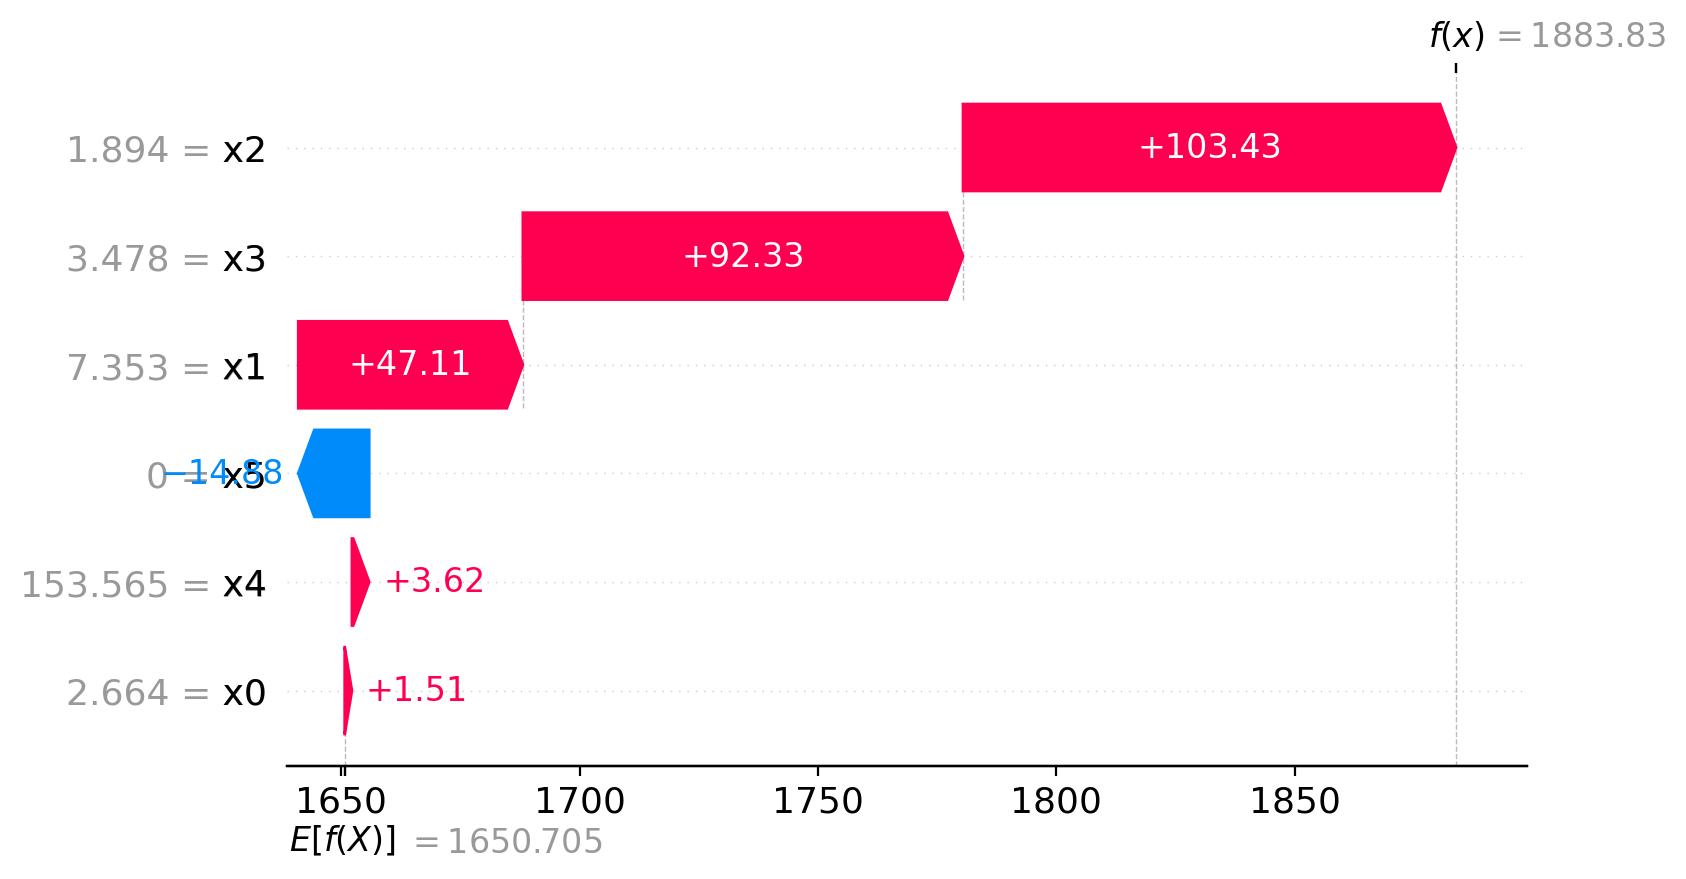

In [83]:
shap_vis(best_shap_np[0],y_model(baseline_clone).item(),X_test_sample.iloc[y_test_series.argmax()])

[ -0.97938013  -7.9964294    0.66041183 -50.638042     0.31990242
 -14.991082  ]
1650.7047119140625
x0      0.021823
x1      1.065156
x2      0.029714
x3     -0.006364
x4    156.025954
x5      0.000000
Name: 22115, dtype: float64


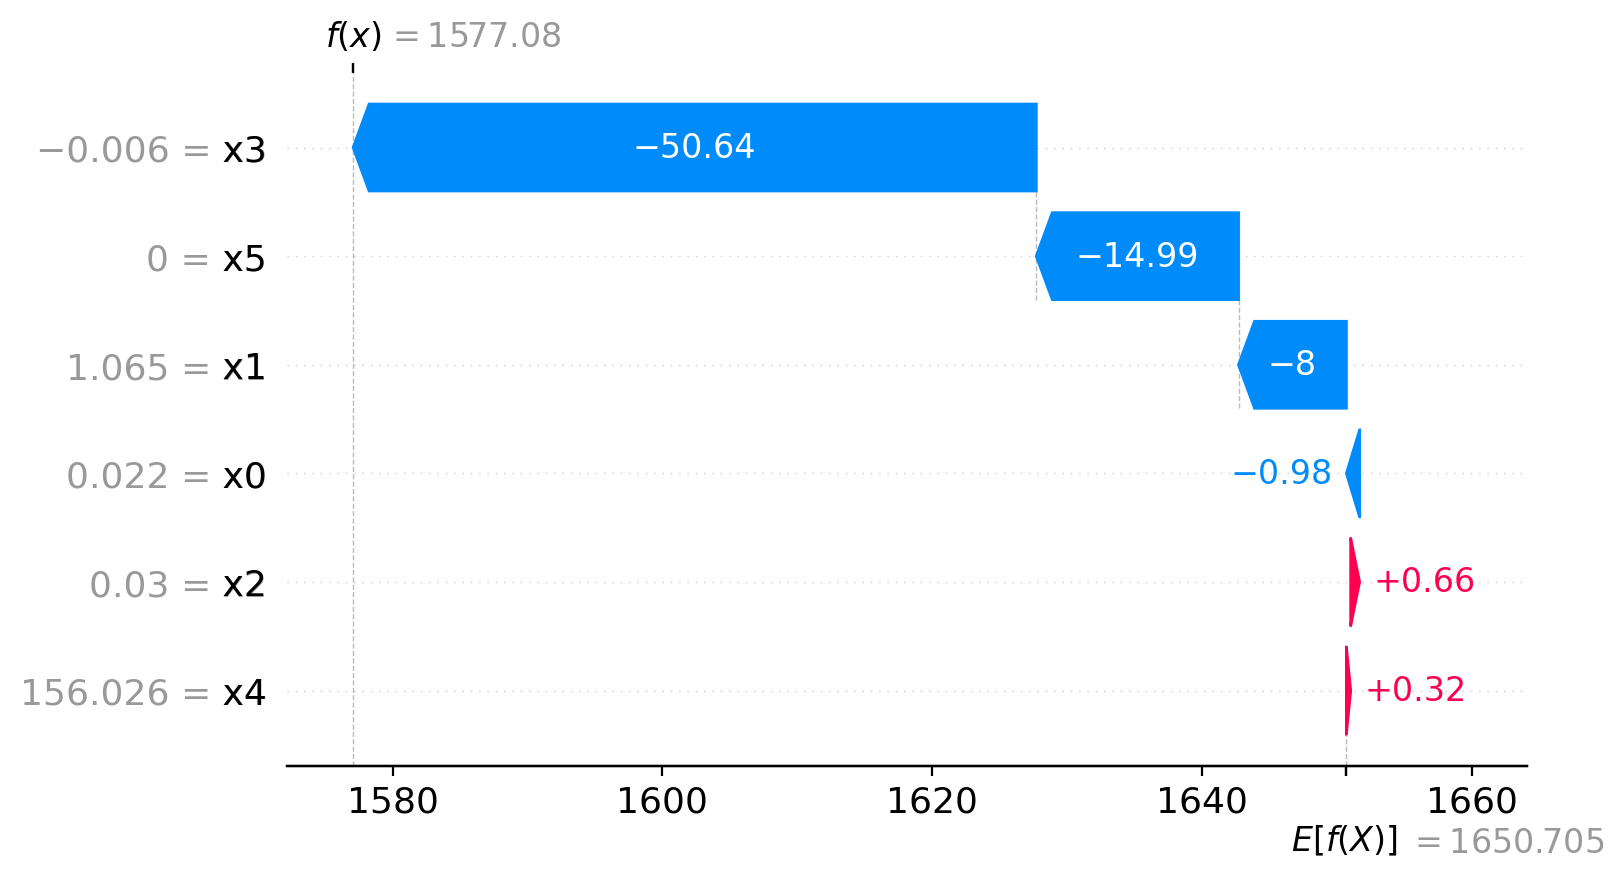

In [84]:
shap_vis(worst_shap_np[0],y_model(baseline_clone).item(),X_test_sample.iloc[y_test_series.argmin()])

## Feature importance

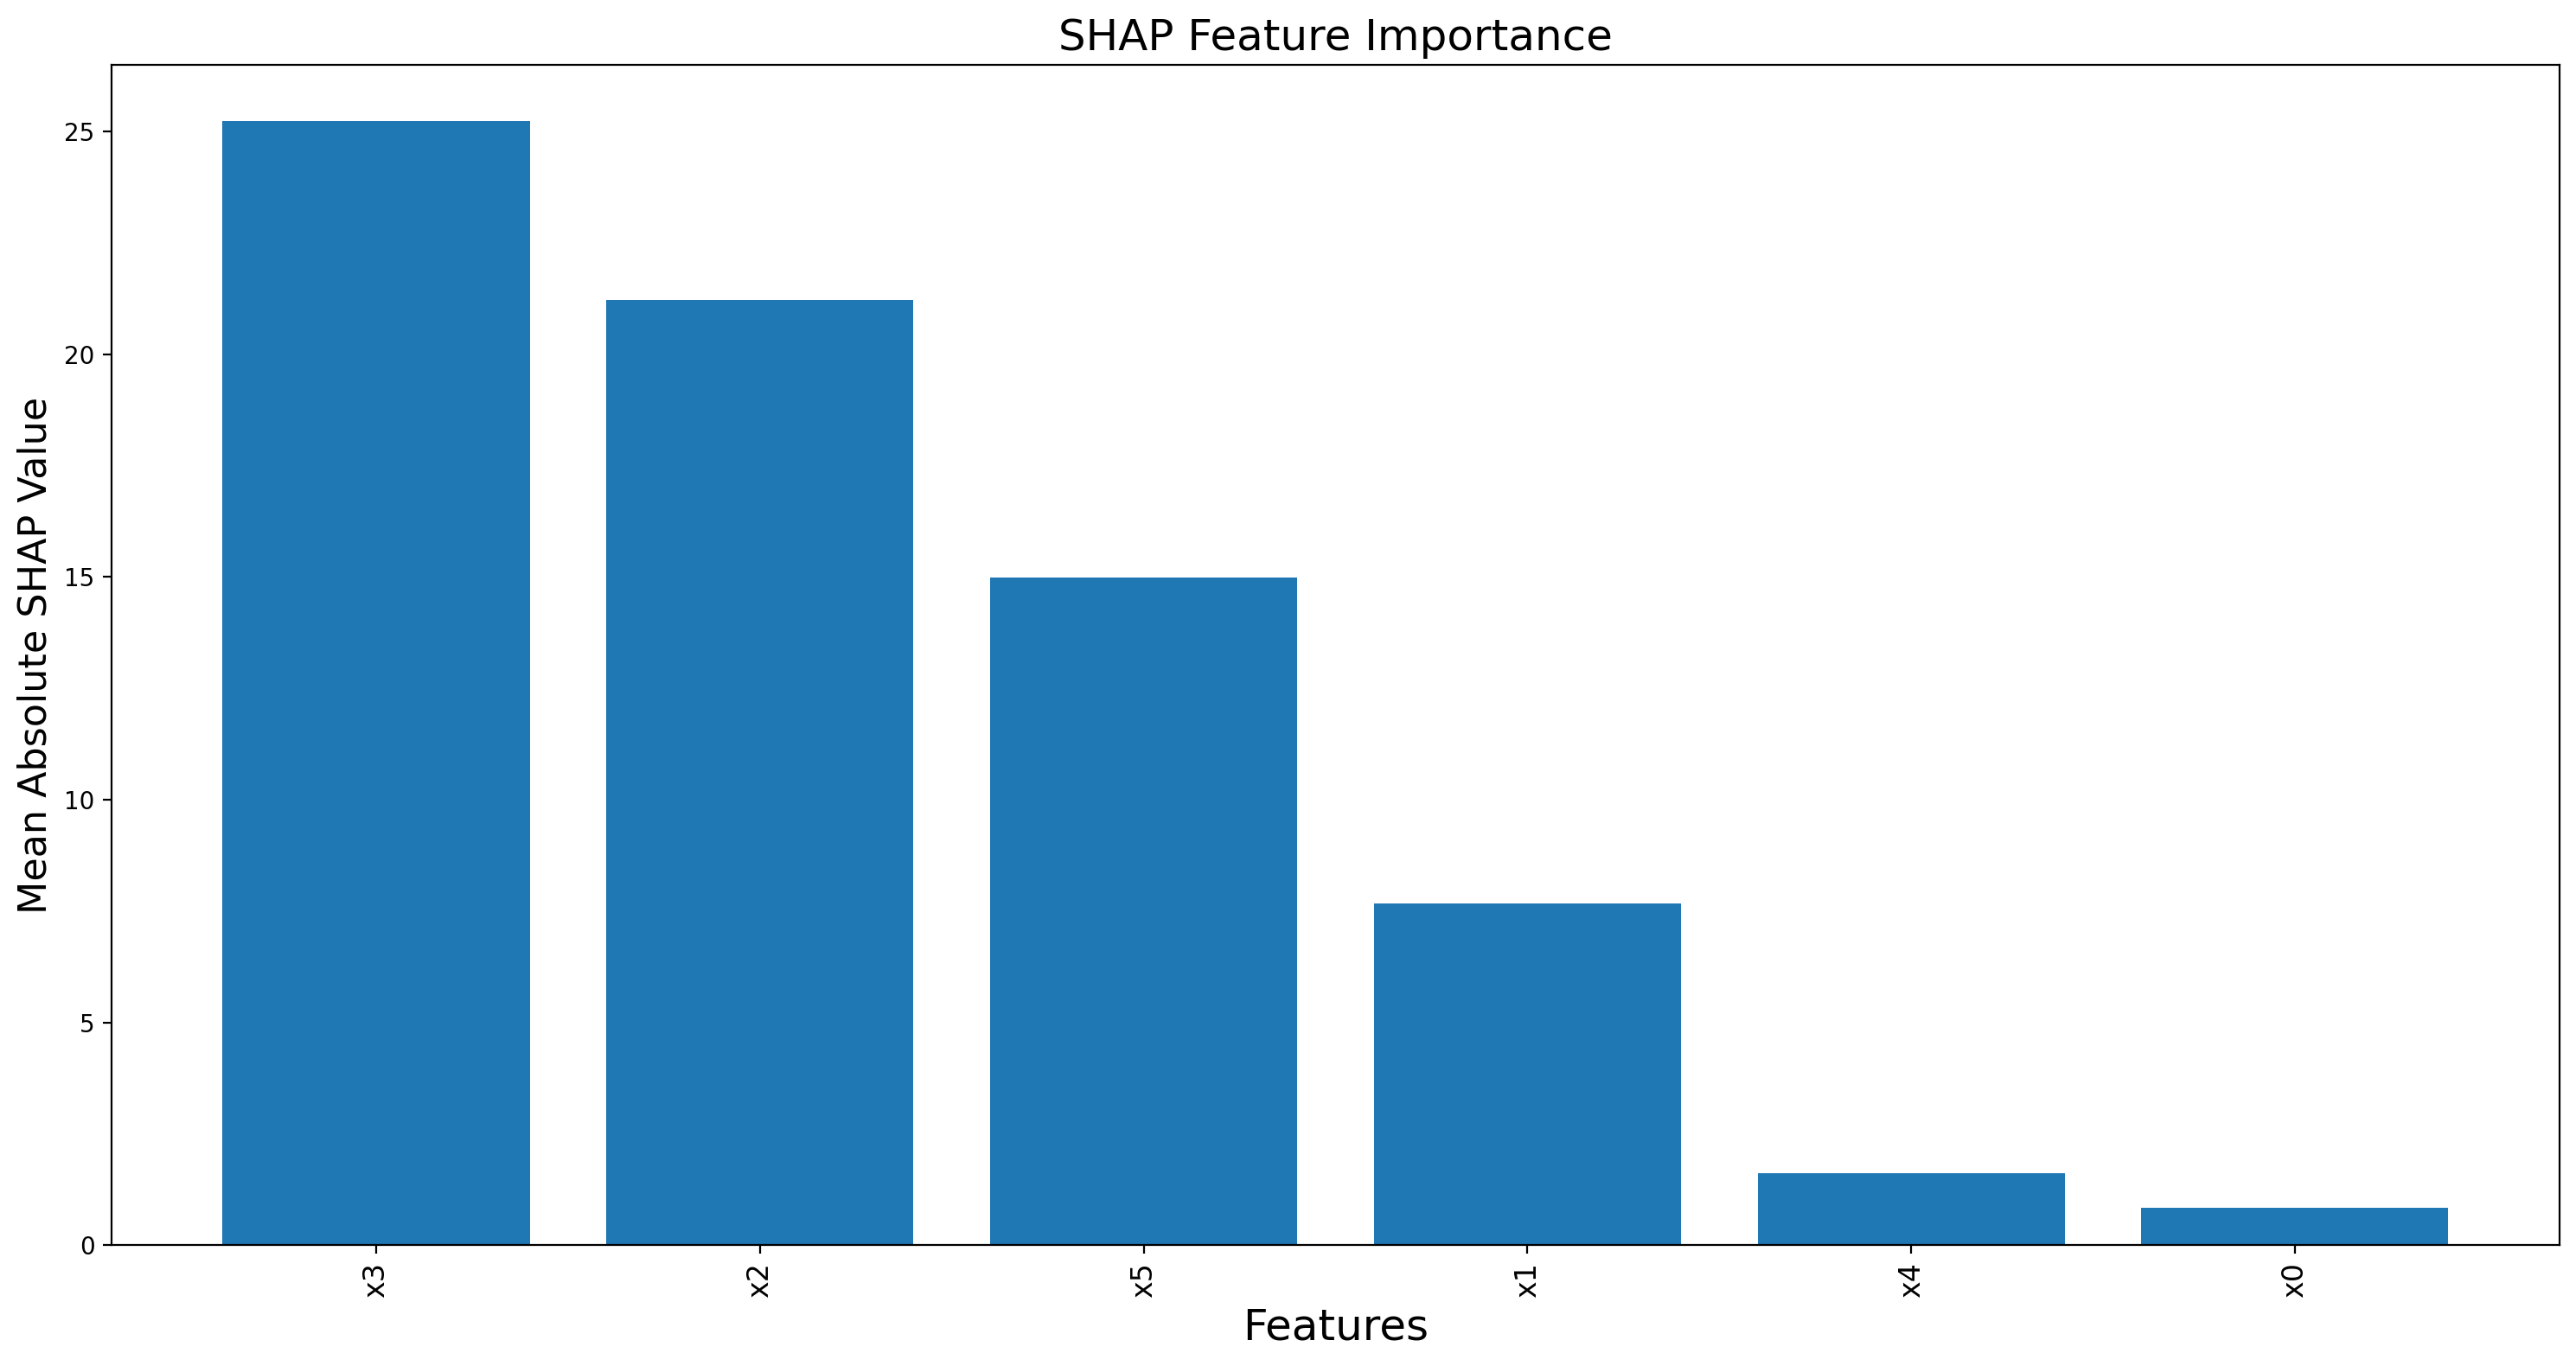

In [85]:
import torch
import numpy as np
from captum.attr import KernelShap
import matplotlib.pyplot as plt

# Instantiate KernelShap
shap = KernelShap(y_model)

# Prepare your dataset
# Here, let's assume X_train is your entire dataset
# And that it's a PyTorch Tensor

X_test_t = torch.from_numpy(X_test_sample.values)  # assuming X_train is numpy array

# Attribute SHAP values
global_shap_values = []

for instance in X_test_t:
    shap_values = shap.attribute(instance.unsqueeze(0).float().to(device), baseline_clone,n_samples=5000)
    global_shap_values.append(shap_values.detach().cpu().numpy())

global_shap_values = np.array(global_shap_values)
global_shap_values = global_shap_values.reshape(-1, global_shap_values.shape[-1])

# Compute the mean absolute SHAP values for each feature
feature_importance = np.mean(np.abs(global_shap_values), axis=0)

# Sort features by their importance
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = X_test.columns[sorted_indices]

# Plot the SHAP feature importance
plt.figure(figsize=(15, 8),dpi=200)
plt.bar(sorted_feature_names, sorted_feature_importance)
plt.title('SHAP Feature Importance',fontsize=18)
plt.xlabel('Features',fontsize=18)
plt.ylabel('Mean Absolute SHAP Value',fontsize=16)
plt.xticks(rotation=90,fontsize=12)
plt.tight_layout()
plt.show()


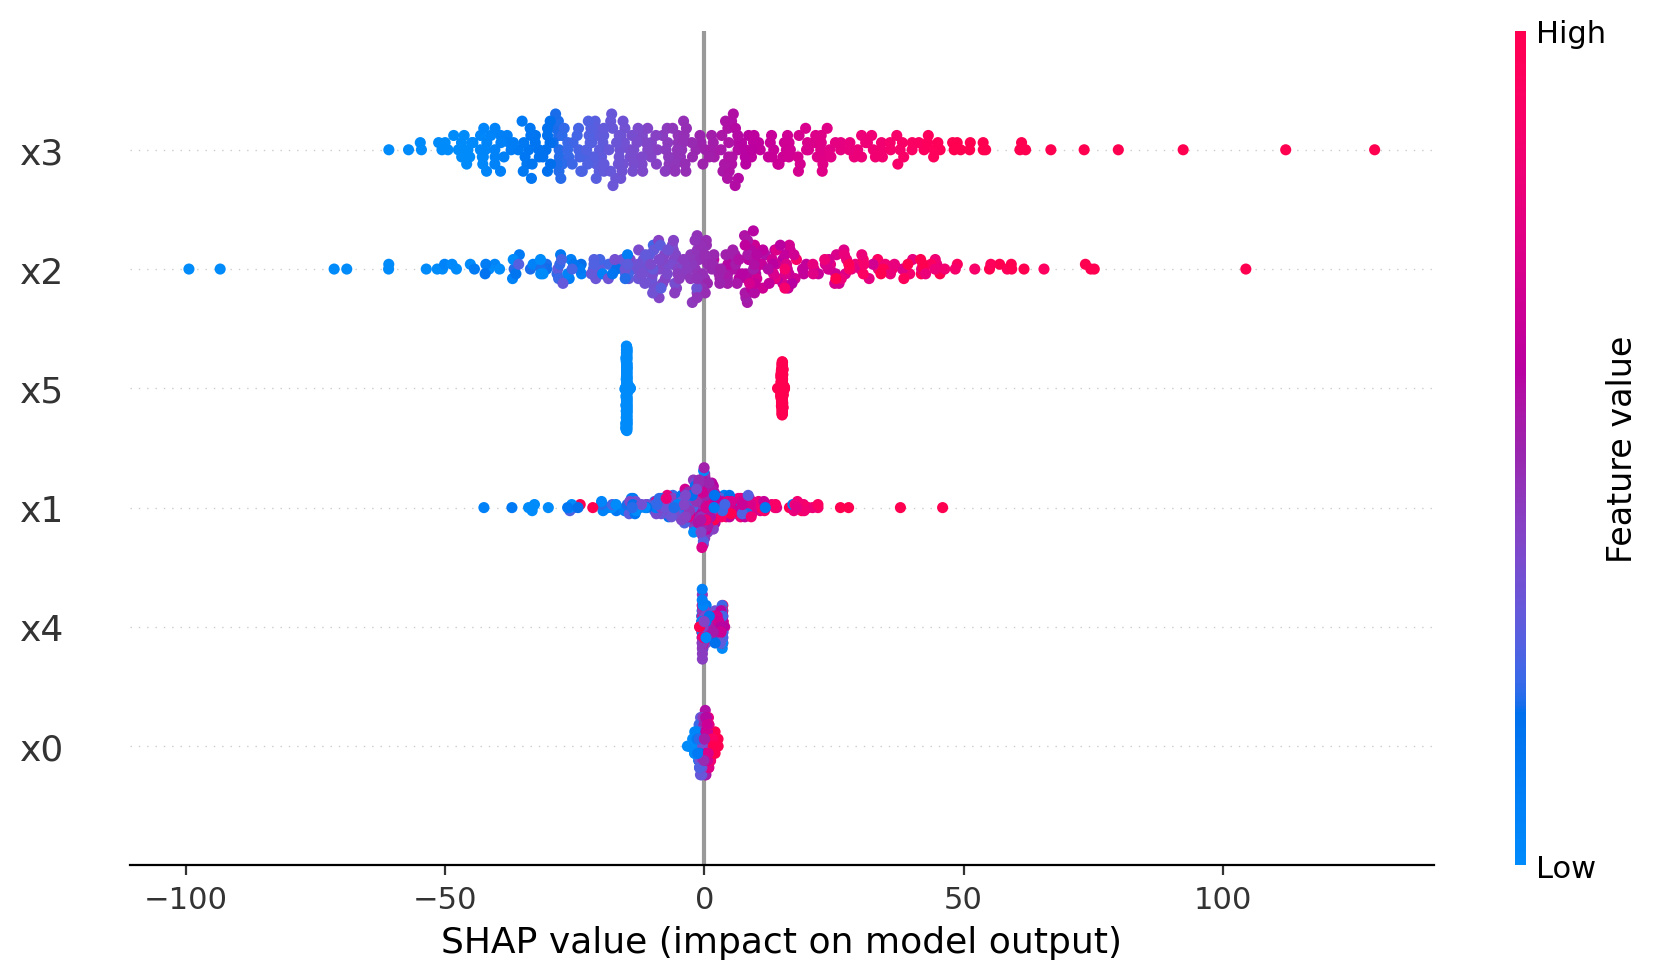

In [86]:
import shap

# Convert the global_shap_values back to a format that shap.summary_plot can understand
global_shap_values = global_shap_values.reshape(global_shap_values.shape[0], -1)

# Create a SHAP summary plot
shap.summary_plot(global_shap_values, X_test_sample, feature_names=X_test.columns,plot_size=(9,5))
